Initial EDA on the relationship between player power influence and performance.

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/Users/Xuhuiz2/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Load dataset
player_social_influence = pd.read_csv("/Users/Xuhuiz2/Desktop/nba_2017_players_with_salary_wiki_twitter.csv", index_col = 0); player_social_influence.head() 

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


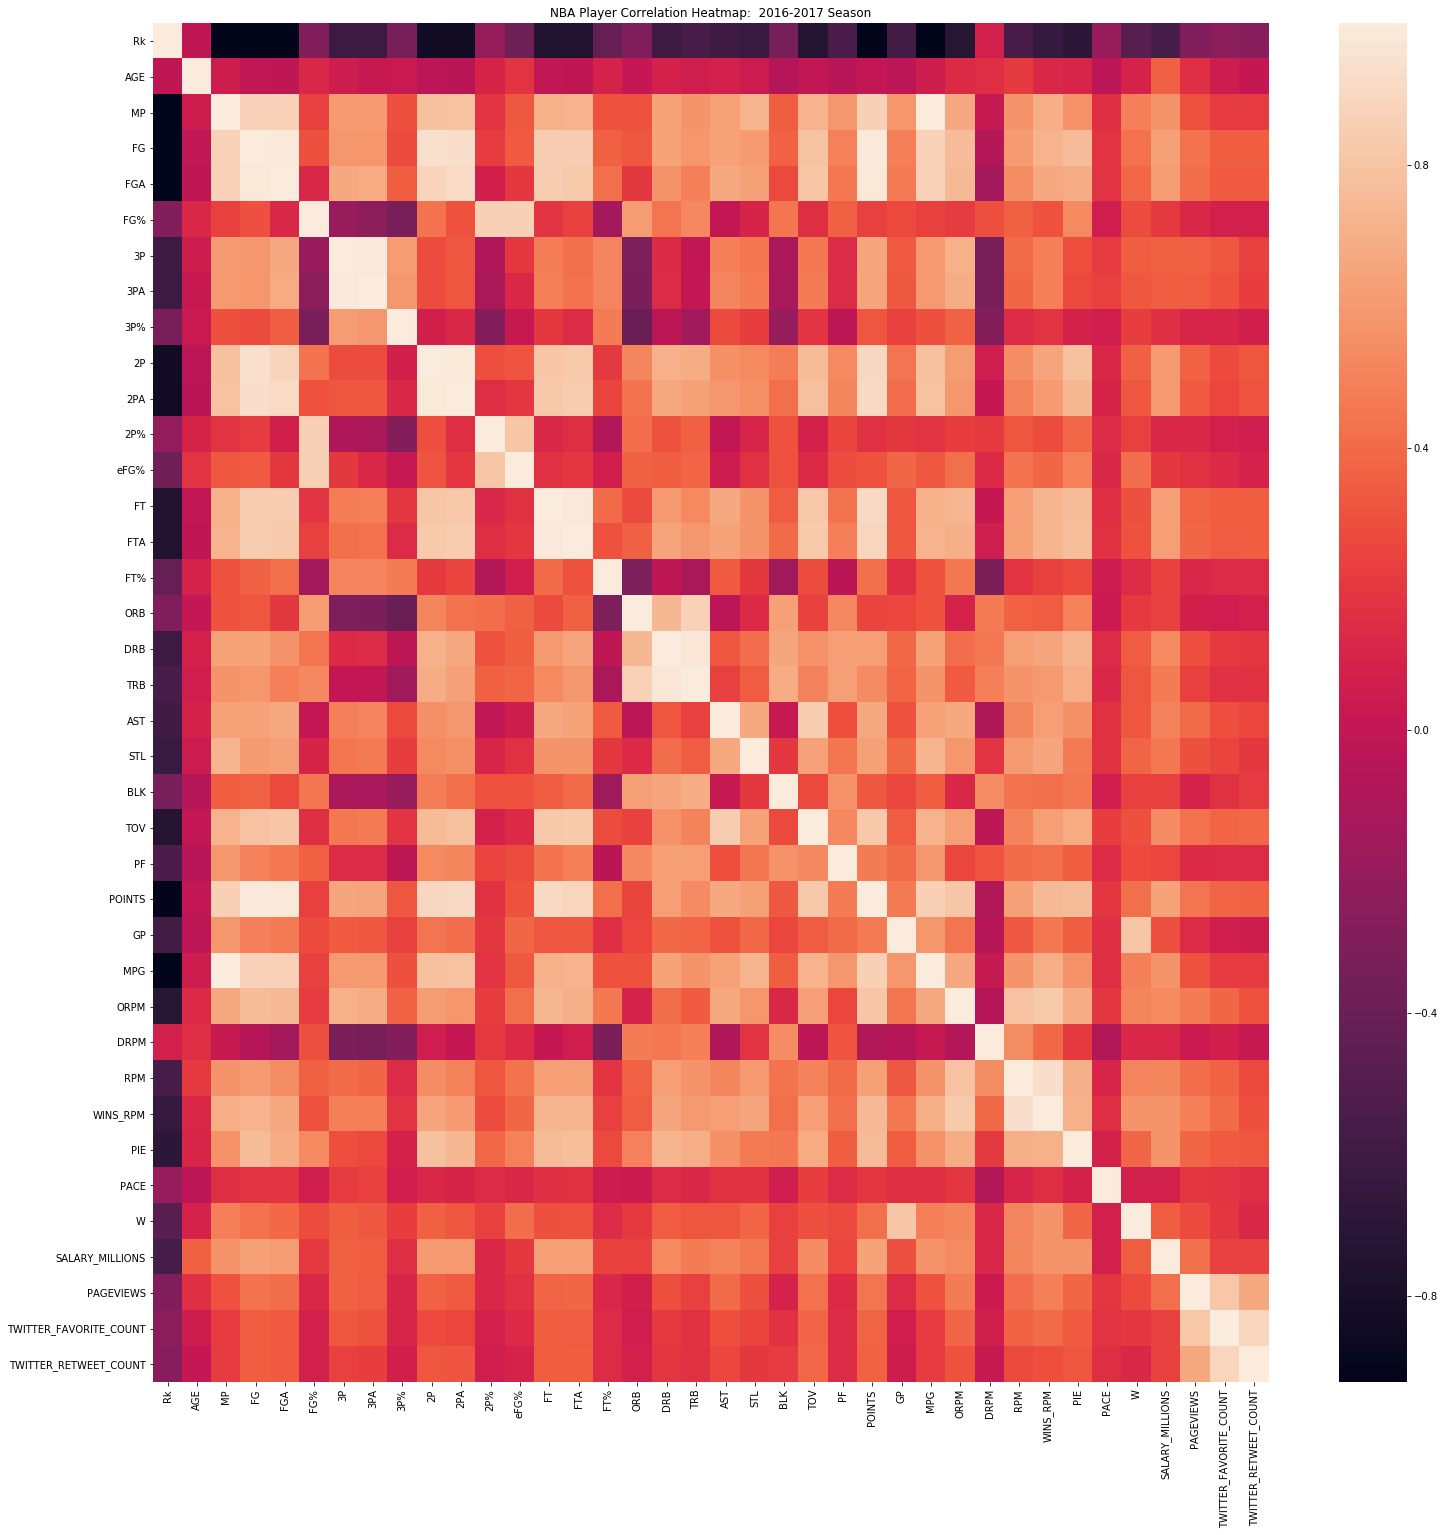

In [4]:
# Correlation heatmap
plt.subplots(figsize=(25,25))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season")
corr = player_social_influence.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

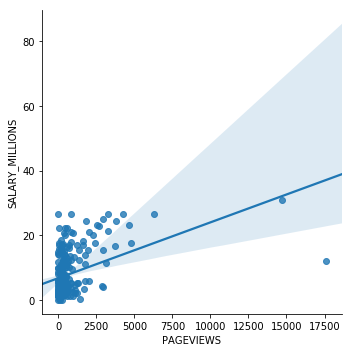

In [5]:
# Relationship between SALARY_MILLIONS and PAGEVIEWS
sns.lmplot(x="PAGEVIEWS", y="SALARY_MILLIONS", data=player_social_influence)

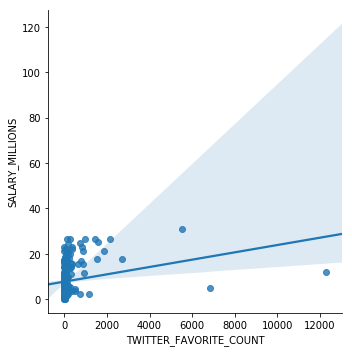

In [6]:
# Relationship between SALARY_MILLIONS and TWITTER_FAVORITE_COUNT
sns.lmplot(x="TWITTER_FAVORITE_COUNT", y="SALARY_MILLIONS", data=player_social_influence)

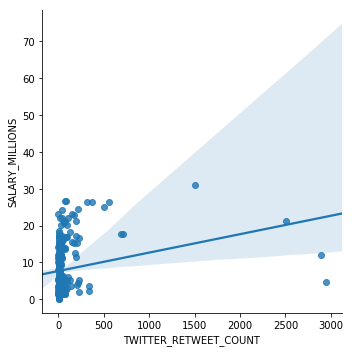

In [7]:
# Relationship between SALARY_MILLIONS and TWITTER_RETWEET_COUNT
sns.lmplot(x="TWITTER_RETWEET_COUNT", y="SALARY_MILLIONS", data=player_social_influence)

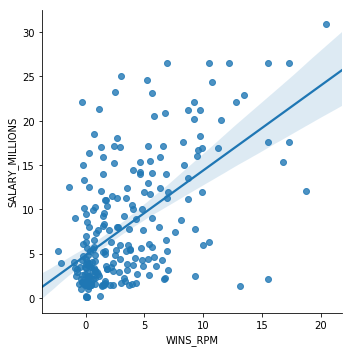

In [8]:
# Relationship between SALARY_MILLIONS and WINS_RPM
sns.lmplot(x="WINS_RPM", y="SALARY_MILLIONS", data=player_social_influence)

In [9]:
# Relationship between SALARY_MILLIONS and Social Influence
results = smf.ols(formula='SALARY_MILLIONS ~ PAGEVIEWS + TWITTER_FAVORITE_COUNT + TWITTER_RETWEET_COUNT', data=player_social_influence).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     23.59
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           2.30e-13
Time:                        00:28:44   Log-Likelihood:                -761.33
No. Observations:                 236   AIC:                             1531.
Df Residuals:                     232   BIC:                             1545.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

In [10]:
# Relationship between Player's performance and WINS_RPM
result = smf.ols(formula='WINS_RPM ~ POINTS + TRB + AST + STL + BLK + TOV + PF', data=player_social_influence).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           6.21e-67
Time:                        00:28:45   Log-Likelihood:                -513.78
No. Observations:                 239   AIC:                             1044.
Df Residuals:                     231   BIC:                             1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6034      0.441     -5.897      0.0

In [11]:
# Add a column called Social_Influence: Add PAGEVIEWS, TWITTER_FAVORITE_COUNT, TWITTER_RETWEET_COUNT
player_social_influence['Social_Influence'] = player_social_influence['PAGEVIEWS'] + player_social_influence['TWITTER_FAVORITE_COUNT'] + player_social_influence['TWITTER_RETWEET_COUNT']
player_social_influence.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,Social_Influence
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0,6968.5
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5,4569.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0,554.5
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5,1819.0
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0,2060.0


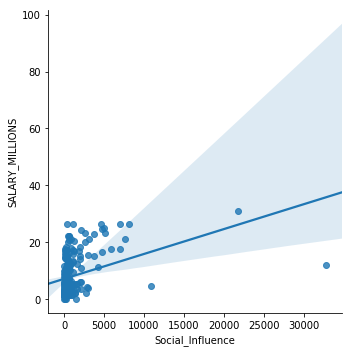

In [12]:
# Relationship between SALARY_MILLIONS and Social Influence
sns.lmplot(x="Social_Influence", y="SALARY_MILLIONS", data=player_social_influence)

In [25]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 558kB/s eta 0:00:01


In [26]:
# Load ggplot package
from ggplot import *

/Users/Xuhuiz2/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Xuhuiz2/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


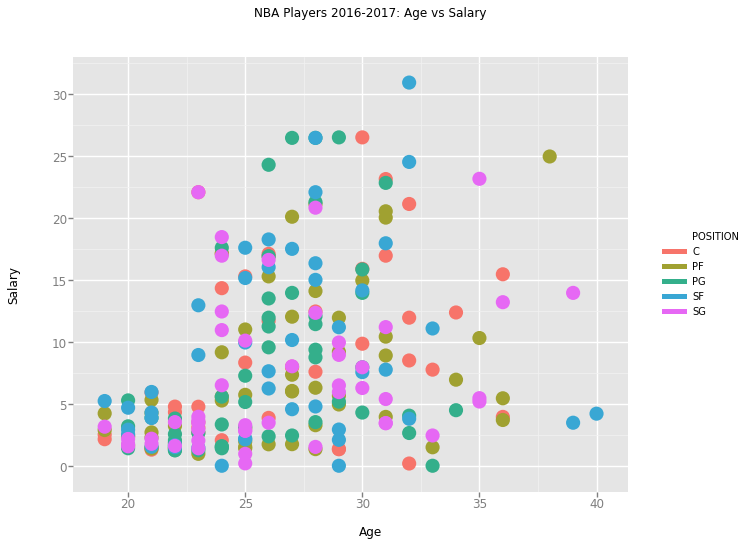

<ggplot: (287885309)>

In [27]:
# Relationship between Salary and Age for five positions
p = ggplot(player_social_influence,aes(x="AGE", y="SALARY_MILLIONS", color="POSITION")) + geom_point(size=200)
p + xlab("Age") + ylab("Salary") + ggtitle("NBA Players 2016-2017: Age vs Salary")

In [28]:
# Order Player by Salary and Social Influence descendingly: List top 5
player_social_influence.sort_values(by=['SALARY_MILLIONS', 'Social_Influence'], ascending=[False, False])
player_social_influence.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,Social_Influence
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0,6968.5
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5,4569.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0,554.5
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5,1819.0
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0,2060.0
